In [69]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/ingr_map.pkl
data/interactions_test.csv
data/interactions_train.csv
data/interactions_validation.csv
data/PP_recipes.csv
data/PP_users.csv
data/RAW_interactions.csv
data/RAW_recipes.csv


In [71]:
recipes = pd.read_csv('data/RAW_recipes.csv', delimiter=',')
recipes.dataframeName = 'recipes.csv'

reviews = pd.read_csv('data/RAW_interactions.csv', delimiter = ",")
reviews.dataframeName = 'reviews.csv'

In [72]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [73]:
reviews['id'] = reviews['recipe_id']
reviews = reviews.drop(['recipe_id'],axis=1)
reviews.columns

Index(['user_id', 'date', 'rating', 'review', 'id'], dtype='object')

In [74]:
food = pd.merge(recipes,reviews,on='id',how='inner')
food.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,28603,2002-08-19,0,"Have not tried this, but it sounds delicious. ..."
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,2006-08-27,5,This recipe was wonderful. Instead of using t...


In [75]:
#na values per column
food.isna().sum()

name                  1
id                    0
minutes               0
contributor_id        0
submitted             0
tags                  0
nutrition             0
n_steps               0
steps                 0
description       23510
ingredients           0
n_ingredients         0
user_id               0
date                  0
rating                0
review              169
dtype: int64

In [76]:
food2 = pd.DataFrame()
food2['name'] = food['name']
food2['submission_month'] = pd.DatetimeIndex(food['submitted']).month
food2['submission_year'] = pd.DatetimeIndex(food['submitted']).year
food2['review_month'] = pd.DatetimeIndex(food['date']).month
food2['review_year'] = pd.DatetimeIndex(food['date']).year
food2.head()

,name,submission_month,submission_year,review_month,review_year
0,arriba baked winter squash mexican style,9,2005,2,2006
1,arriba baked winter squash mexican style,9,2005,8,2010
2,arriba baked winter squash mexican style,9,2005,12,2011
3,a bit different breakfast pizza,6,2002,8,2002
4,a bit different breakfast pizza,6,2002,8,2006


In [77]:
food3 = pd.DataFrame()
food3['temp'] = food['nutrition']
food3['temp'] = food3['temp'].str.strip('[')
food3['temp'] = food3['temp'].str.strip(']')
food3['temp'] = food3['temp'].str.split(',').tolist()
food3[['calories','total_fat','sugar','sodium','protein','sat_fat','carbs']] = pd.DataFrame(food3["temp"].values.tolist(),index = food3.index)
food3 = food3.drop(['temp'],axis=1)
food3['name'] = food['name']
food3.head()

,calories,total_fat,sugar,sodium,protein,sat_fat,carbs,name
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0,arriba baked winter squash mexican style
1,51.5,0.0,13.0,0.0,2.0,0.0,4.0,arriba baked winter squash mexican style
2,51.5,0.0,13.0,0.0,2.0,0.0,4.0,arriba baked winter squash mexican style
3,173.4,18.0,0.0,17.0,22.0,35.0,1.0,a bit different breakfast pizza
4,173.4,18.0,0.0,17.0,22.0,35.0,1.0,a bit different breakfast pizza


In [78]:
food3 = food3.drop_duplicates()
food3.head()

,calories,total_fat,sugar,sodium,protein,sat_fat,carbs,name
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0,arriba baked winter squash mexican style
3,173.4,18.0,0.0,17.0,22.0,35.0,1.0,a bit different breakfast pizza
7,269.8,22.0,32.0,48.0,39.0,27.0,5.0,all in the kitchen chili
8,368.1,17.0,10.0,2.0,14.0,8.0,20.0,alouette potatoes
10,352.9,1.0,337.0,23.0,3.0,0.0,28.0,amish tomato ketchup for canning


In [79]:
food['log_minutes'] = np.log(food["minutes"]+1)

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


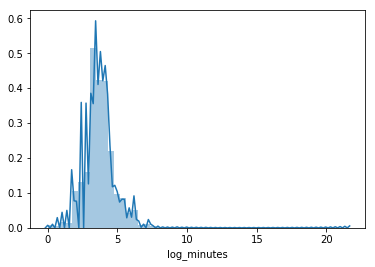

In [80]:
sns.distplot(food["log_minutes"],hist=True,kde=True)

In [81]:
def bargraph(feature,heading = "",bins = None):
    plt.hist(feature,bins = bins)
    plt.title(heading)
    

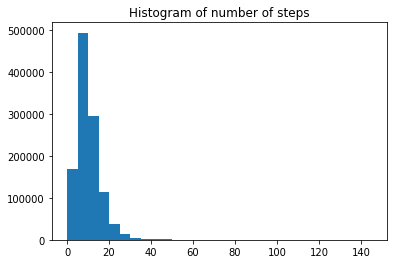

In [82]:
bargraph(food['n_steps'],"Histogram of number of steps",bins = int((food['n_steps'].max() - food['n_steps'].min())/5))

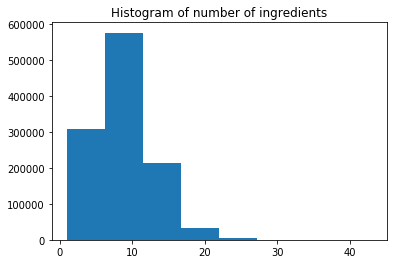

In [83]:
bargraph(food['n_ingredients'],"Histogram of number of ingredients",bins = int((food['n_ingredients'].max() - food['n_ingredients'].min())/5))

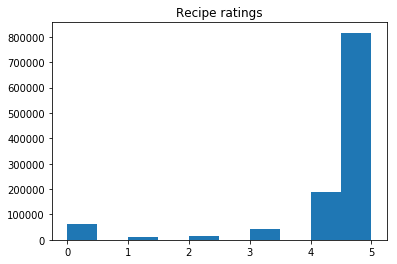

In [84]:
bargraph(food["rating"],"Recipe ratings")

In [85]:
def stackedHistogram(lists,heading):
    plt.hist(lists,stacked=True)
    plt.title(heading)

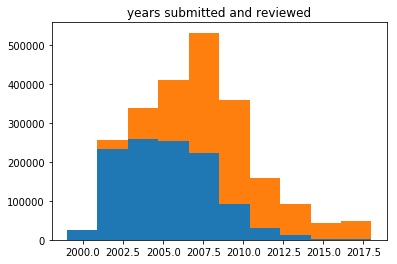

In [86]:
stackedHistogram([food2['submission_year'],food2['review_year']],"years submitted and reviewed")

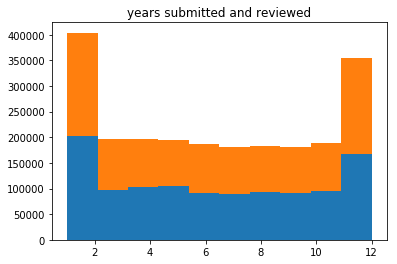

In [87]:
stackedHistogram([food2['submission_month'],food2['review_month']],"years submitted and reviewed")

In [88]:
def densityPlot(feature,heading):
    sns.distplot(feature,hist=True,kde=True)
    plt.title(heading)

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


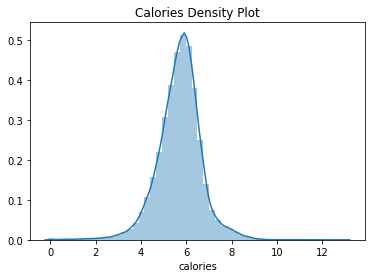

In [89]:
densityPlot(np.log(food3['calories'].astype('float')+1),"Calories Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


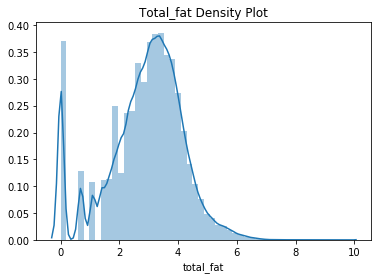

In [90]:
densityPlot(np.log(food3['total_fat'].astype('float')+1),"Total_fat Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


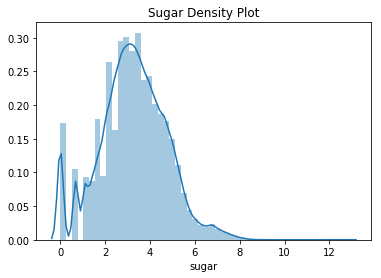

In [91]:
densityPlot(np.log(food3['sugar'].astype('float')+1),"Sugar Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


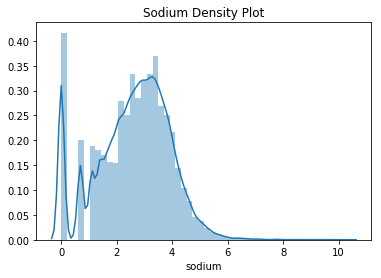

In [92]:
densityPlot(np.log(food3['sodium'].astype('float')+1),"Sodium Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


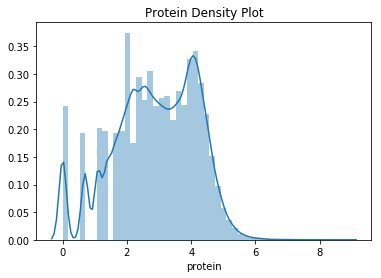

In [93]:
densityPlot(np.log(food3['protein'].astype('float')+1),"Protein Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


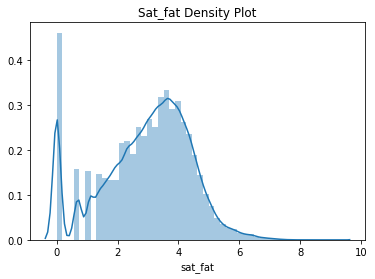

In [94]:
densityPlot(np.log(food3['sat_fat'].astype('float')+1),"Sat_fat Density Plot")

C:\Users\uditi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


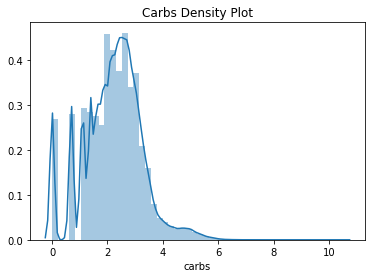

In [95]:
densityPlot(np.log(food3['carbs'].astype('float')+1),"Carbs Density Plot")